# Week 5: Probability Distributions

In [1]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random

## Day 3: Random Variables & Probability Distributions

* Let us toss a fair coin. Two outcomes are possible: **H** or **T**. Let us introduce a variable $X$ that will count the number of **H** when tossing.
* $X \in \{0, 1\}$ -- there are two possible values for $X$:
    * $X = 0$ means that **H** has not occurred
    * $X = 1$ means that **H** has occurred

We can summarize the outcomes in a table or on a bar graph

In [2]:
table = pd.DataFrame(columns=['0', '1'], index = ['P(X=x)'])

table.loc['P(X=x)'] = [0.5, 0.5]

table

,0,1
P(x),0.5,0.5


* The variable defined in this way, as a set of values and **likelihoods** assigned to the possible values, is called a **random variable**
* Strictly speaking, a random variable is a function that assigns likelihoods to all possible values in an experiment/trial

### Example 1.1
A couple plans to have two children. Let $G$ be the random variable “number of girls the couple has”. If there is an equal probability of a child to be a boy or a girl, define the possible values of $G$ and calculate the probability for each of them. Then represent the results in a table and on a bar graph.

In [8]:
# There are ??? possible values of G: 

n = 10000 # number of simulations
G = np.zeros(3) # store the number of children here

for i in range(n): # loop through the simulations
    child_1 = random.choice([0,1])
    child_2 = random.choice([0,1])
    
    G[child_1 + child_2] += 1
    
prob_G = np.round(G/n, 3)

table = pd.DataFrame(columns=['0', '1', '2'], index = ['P(X=x)'])
table.loc['P(X=x)'] = prob_G
table

,0,1,2
P(X=x),0.247,0.497,0.256


### Example 1.2
A couple plans to have three children. Let $G$ be the random variable “number of girls the couple has”. If there is an equal probability of a child to be a boy or a girl, define the possible values of $G$ and calculate the probability for each of them. Then represent the results in a table and on a bar graph.

In [10]:
n = 10000 # number of simulations
G = np.zeros(4) # store the number of children here

for i in range(n): # loop through the simulations
    child_1 = random.choice([0,1])
    child_2 = random.choice([0,1])
    child_3 = random.choice([0,1])
    
    G[child_1 + child_2 + child_3] += 1
    
prob_G = np.round(G/n, 3)

table = pd.DataFrame(columns=['0', '1', '2', '3'], index = ['P(X=x)'])
table.loc['P(X=x)'] = prob_G
table

,0,1,2,3
P(X=x),0.128,0.372,0.369,0.131


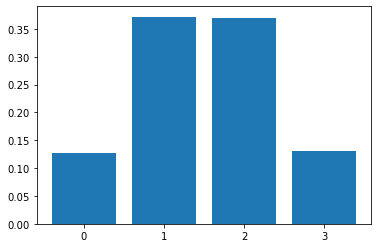

In [11]:
plt.figure()
plt.bar(x = ['0', '1', '2', '3'], height = [prob_G[0], prob_G[1], prob_G[2], prob_G[3]])
plt.show()

### Example 2
As the head of inventory for Knowway Computer Company, you were thrilled that you had managed to ship 2 computers to your biggest client the day the order arrived. You are horrified, though, to find out that someone had restocked refurbished computers in with the new computers in your storeroom. The shipped computers were selected randomly from the 15 computers in stock, but 4 of those were actually refurbished.
* If your client gets 2 new computers, things are fine.
* If the client gets one refurbished computer, it will be sent back at your expense \$100 and you can replace it.
* However, if both computers are refurbished, the client will cancel the order this month and you’ll lose a total of \$1000.

If $L$ is the random variable "amount of money you lose", then give the possible values for $L$ and find their probabilities.

In [15]:
n = 1000 # number of simulations
L = np.zeros(3) # initializing the variable L (0=$0 loss, 1=$100 loss, 2=$1000 loss)

for i in range(n): # loop thorough the simulations
    comps_in_stock = list(range(1,16))
    n_ref = 0
    
    comp_1 = random.choice(comps_in_stock)
    comps_in_stock.remove(comp_1)
    
    comp_2 = random.choice(comps_in_stock)
    
    if comp_1 <= 4:
        n_ref += 1
    if comp_2 <= 4:
        n_ref += 1
        
    L[n_ref] += 1
    
prob_L = np.round(L/n, 3)

table = pd.DataFrame(columns=['0', '100', '1000'], index = ['P(X=x)'])
table.loc['P(X=x)'] = prob_L
table

,0,100,1000
P(X=x),0.507,0.43,0.063


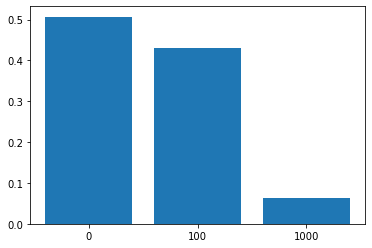

In [16]:
plt.figure()
plt.bar(x = ['0', '100', '1000'], height = [prob_L[0], prob_L[1], prob_L[2]])
plt.show()

,0,100,1000
P(X=x),0.507,0.43,0.063


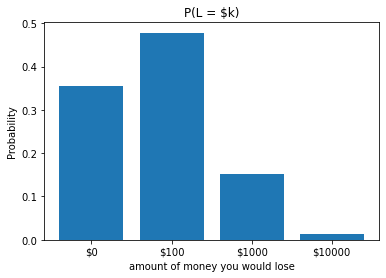

In [17]:
n = 1000 # number of simulations
L = np.zeros(4) # initializing the variable L (0=$0 loss, 1=$100 loss, 2=$1000 loss)
for i in range(n): # loop thorough the simulations
    comps_in_stock = list(range(1, 16))
    n_ref = 0
    comp_1 = random.choice(comps_in_stock)
    comps_in_stock.remove(comp_1)
    comp_2 = random.choice(comps_in_stock)
    comps_in_stock.remove(comp_2)
    comp_3 = random.choice(comps_in_stock)
    if comp_1 <= 4:
        n_ref +=1
    if comp_2 <= 4:
        n_ref +=1
    if comp_3 <= 4:
        n_ref +=1
    L[n_ref] +=1
prob_L = np.round(L/n, 3)
talbe = pd.DataFrame(columns = ['$0', '$100', '$1000', '$10000'], index=['P(L=k)'])
talbe.loc['P(L=k)'] = prob_L
display(table)
plt.figure()
plt.bar(x = ['$0', '$100', '$1000', '$10000'] , height = [prob_L[0], prob_L[1], prob_L[2], prob_L[3]])
plt.title('P(L = $k)')
plt.xlabel('amount of money you would lose')
plt.ylabel('Probability')
plt.show()

### Types of random variables
* There are two types of random variables that we will discuss in class: **discrete** and **continuous** 
(*N.B.* it is possible though that it is neither of these, but a discrete "approximation" can always be found).
* If the outcomes are “listable” (finite or infinitely many of them), then the random variable is **discrete**.
* They can be summarized in tables and bar graphs similar
* For a random variable $X$ with outcomes $x_1, x_2, \ldots, x_n$ we label $p_i = P(X = x_i)$.
* The sum of the probabilities: $p_1 + p_2 + \ldots + p_n = 1$ 
* The function that assigns probabilities to the values of a discrete random variable is called **probability mass function (pmf)**


### Expected Value, Variance and Standard Deviation
* For a random variable we can define "mean" which we call **expected value**, or **expectation**, and label by $E(X)$. In similar analogy with descriptive statistics, we can define **variance** $Var(X)$ and **standard deviation** $\sigma_X$. THey are given by

\begin{equation}
\begin{array}{rcl}
E(X) &=& \displaystyle\sum_{i=1}^{n} x_i \cdot P(X=x_i)\\
Var(X) &=& \displaystyle\sum_{i=1}^{n} \Big(x_i - E(X) \Big)^2 \cdot P(X=x_i)\\
\sigma_X &=& \sqrt{Var(X)}
\end{array}
\end{equation}


### Example 3
Calculate the $E(L)$, $Var(L)$ and $\sigma_L$ for the random variable $L$ in **Example 2**

In [ ]:
possible_losses = np.array([0, 100, 1000]) # define the losses l_i


### Continuous Random Variables

* In some cases, outcomes cannot be listed, e.g. measuring heights or weights of people
* In such cases the random variables we work with are called **continuous random variables**
* The role of the pmf is taken by a **probability density function (pdf)**
* The pdf, say $f(x)$, has a property that
\begin{equation} \int_{-\infty}^{+\infty} f(x)\, dx = 1\end{equation}
* Let $X$ be a continuous random variable and let $[a, b]$ be an interval of possible outcomes. We define the probability that $X \in [a, b]$, or $a \leqslant X \leqslant b$, by
\begin{equation}
P(X \in [a, b]) = P(a \leqslant X \leqslant b) = \int_a^b f(x)\, dx
\end{equation}

### Example 4
Let $X$ be a random variable such that $X \in [0, 1]$, and the pdf is given by
\begin{equation}f(x) = \frac{15}{2} x^2 (1-x^2)\end{equation}
* Show that that $f(x)$ is really a pdf, i.e. that $P(0 \leqslant X \leqslant 1) = 1$
* Find the probability that $X \in [0.5, 0.8]$

In [ ]:
# Use SymPy

### Expected Value, Variance and Standard Deviation for continuous variables
* For a random variable $X$ with a pdf $f(x)$, we define the expected value$E(X)$, the variance $Var(X)$ and the standard deviation $\sigma_X$ as
\begin{equation}
\begin{array}{rcl}
E(X) &=& \displaystyle\int_{-\infty}^{+\infty} x \cdot f(x)\, dx\\
Var(X) &=& \displaystyle\int_{-\infty}^{+\infty} \Big(x - E(X) \Big)^2 \cdot f(x)\, dx\\
\sigma_X &=& \sqrt{Var(X)}
\end{array}
\end{equation}

**Notes:**
* The $E(X)$ and $Var(X)$ exists only if the integral returns a finite value
* Instead of infinite boundaries, we will be using the smallest and largest value that the pdf can take

### Example 5
For the random variable $X$ given in **Example 4** calculate the expectation, the variance and the standard deviation

In [ ]:
# Use SymPy

### Practice #1
A magazine store recorded the number of magazines purchased by its customers in one week. 23% purchased one magazine, 38% purchased two, 21% purchased three, 13% purchased four, and 5% purchased five. Let $X$ be “number of magazines sold”.
* Make a probability table for the random variable.
* Graph the probability distribution.

### Practice #2
A continuous random variable $X$ has a pdf $f(x)$ given by
\begin{equation}
f(x) = 6(x - x^2)
\end{equation}
for $x \in [0, 1]$. Calculate:
* $P(0.2 \leqslant X \leqslant 0.8)$
* $P(X \leqslant 0.7)$
* $P(X \geqslant 0.9)$
* $\sigma_X$